# Data cleaning and preprocessing

**Fungi Specimen Classification project part 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("agaricus-lepiota.data", index_col=None, header=None)
columns = ['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
           'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
           'spore-print-colors', 'population', 'habitat']
data.columns = columns

In [3]:
# move the class label edibility to the back
columns.append(columns[0])
columns.pop(0)

'edibility'

In [4]:
data = data[columns]
pd.options.display.max_columns = None
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-colors,population,habitat,edibility
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


## Data cleaning methodology
Cleaning the stalk-root column of missing values. To clean missing categorical data, there are a few options:
* Fill in with expert knowledge
* Ignore column
* Ignore rows
* Predict with non-missing values

In [5]:
# Exploring the stalk data distribution
stalk = data[['stalk-shape', 'stalk-surface-above-ring','stalk-surface-below-ring', 
            'stalk-color-above-ring', 'stalk-color-below-ring','stalk-root']]
stalk_known = stalk[stalk['stalk-root'] != '?']

### Estimating '?' with other stalk variables
Exploring the possibility of estimating missing stalk-root values with other stalk related variables by visualizing the distributrions

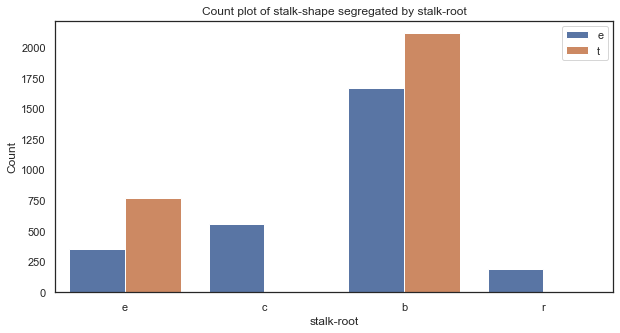

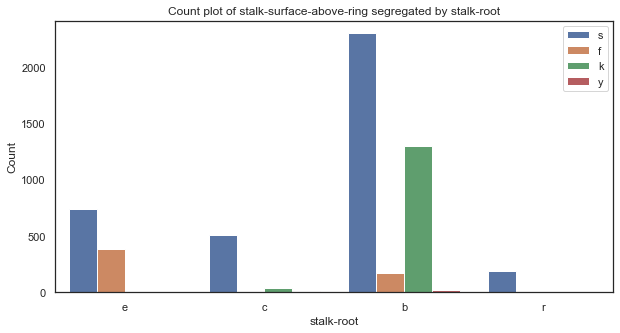

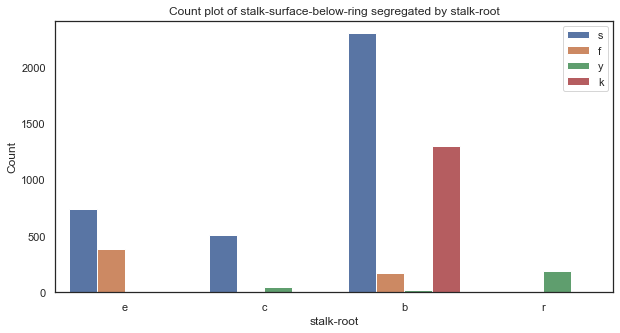

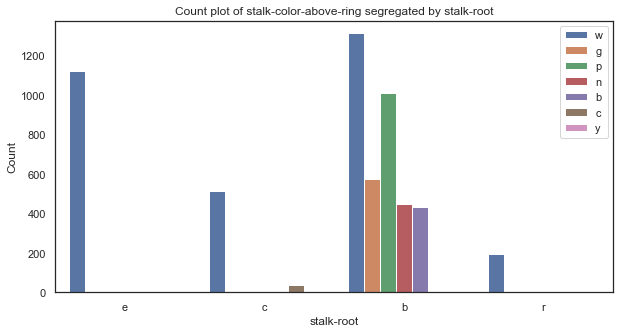

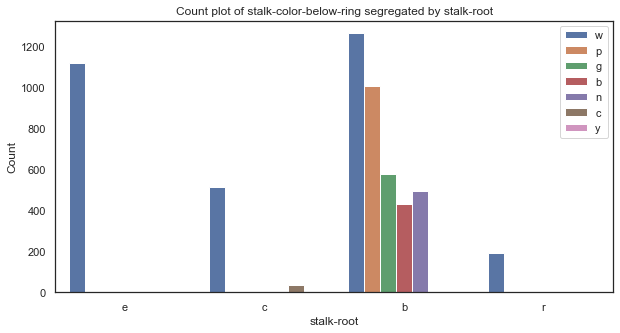

In [6]:
sns.set_theme(style='darkgrid')
for col in stalk.columns[:-1]:
    sns.set_theme(style='white')
    plt.figure(figsize=(10, 5))
    cp = sns.countplot(x="stalk-root", hue=col, data=stalk_known)
    cp.set_ylabel("Count")
    cp.set_title(f'Count plot of {col} segregated by stalk-root');
    cp.legend(loc='upper right')
    plt.show()

The visualized plots of the stalk data show that there is sufficient variance explained by the stalk related features. So this means that it is a worthwhile attempt to increase accuracy by filling in the missing values.

## **However. If a feature value occurs in a row with '?' as the stalk-root but does not occur in all rows without '?', the model will not be able to use that feature value to predict the stalk-root value and accuracy will definiteively be lost.**

In [7]:
print('shape of one hot encoded stalk',pd.get_dummies(stalk).shape)
print('shape of one hot encoded stalk-known',pd.get_dummies(stalk_known).shape)

shape of one hot encoded stalk (8124, 33)
shape of one hot encoded stalk-known (5644, 28)


In [8]:
pd.get_dummies(stalk).head()

,stalk-shape_e,stalk-shape_t,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


The difference in the number of features indicate there are 33-28=5 values that do not occur

## Comparing baseline model and tuned model 
Data has a 80-20 percent train test split. The compare the accuracy between baseline model and tuned model.

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
# One hot encoding as all the variabels are categorical

stalk_ohc = pd.get_dummies(stalk)
stalk_ohc_known = stalk_ohc[stalk_ohc['stalk-root_?'] == 0]
stalk_ohc_known.head()

,stalk-shape_e,stalk-shape_t,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [11]:
# X is the all the one hot encoded variables that are not stalk-root, y is the stalk-root variables
# Eliminate the ? column from y
X = stalk_ohc_known.iloc[:,:-5].to_numpy()
y = stalk_ohc_known.iloc[:,-4:].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = X) #this should be y

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_ = dt.predict(X_train)
acc = round(accuracy_score(y_train, y_), 3)
print(f'training data accuracy {acc}')

y_ = dt.predict(X_test)
acc = round(accuracy_score(y_test, y_), 3)
print(f'testing data accuracy {acc}')

training data accuracy 0.721
testing data accuracy 0.721


In [13]:
# Taking a look at y_ (yhat) to see if the format of the predicted one-hot-encoded variable is correct. 
# 4 attributes, one for each of the possible values b,c,e,r that I want to replace ? with
y_

array([[0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [14]:
def dt_grid_search(criterion, max_depth, min_samples_leaf, max_features):
    # Create the model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, 
                                   min_samples_leaf=min_samples_leaf, max_features=max_features)

    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)

    # Return the hyperparameters and score
    return([criterion, max_depth, min_samples_leaf, max_features, accuracy_score(y_test, predictions)])

# Create the relevant lists of hyperparameters
results_list = []
max_depth_list = list(range(2,40,2))
min_samples_leaf_list = [0.005, 0.01, 0.02, 0.04, 0.08]
max_features_list = list(range(1,18))

# Create the for loop
for criterion in ['gini','entropy']:
    for max_depth in max_depth_list:
        for min_samples_leaf in min_samples_leaf_list:
            for max_features in max_features_list:
                results_list.append(dt_grid_search(criterion, max_depth, min_samples_leaf, max_features))

# Print the results
#print(results_list)  
results_list.sort(key=lambda x:x[4])
print(results_list[-3:])

[['gini', 36, 0.005, 2, 0.7599645704162976], ['entropy', 4, 0.01, 6, 0.7599645704162976], ['gini', 4, 0.005, 6, 0.7661647475642162]]


## Data cleaning conclusions

These are a few of the best performing models after several runs:

*keep in mind that the sampling (train_test_split) is random, and was performed at each run leading to different results

* ['entropy', 30, 0.005, 2, 0.7511071744906997]
* ['entropy', 18, 0.02, 3, 0.7829937998228521]
* ['entropy', 20, 0.01, 1, 0.7670504871567759]
* ['entropy', 14, 0.02, 2, 0.7723649247121346]
* ['entropy', 28, 0.005, 1, 0.7732506643046945]
* ['gini', 8, 0.005, 4, 0.7342781222320638]
* ['gini', 32, 0.02, 3, 0.7608503100088574]
* ['gini', 8, 0.01, 2, 0.7803365810451727]

The average best obtainable test data prediction accuracy of the missing stalk-root variable is around 0.76-0.78, the value of this degree of accuracy suggests that the stalk variables are able to classify the missing values with an acceptable degree of reliability. As the only other alternatives are to remove the stalk-root column or remove around 1/4 of the dataset, I feel confident in using these variables to fill in the missing-values.

I will use the ['entropy', 28, 0.005, 1, 0.7732506643046945] model.

## Data cleaning and processing procedure
1. Predict the values of rows with missing stalk-root feature
2. Replace the missing values of stalk-root in the non-ohc encoded dataframe
    * drop rows with missing data that were unable to be filled
3. One hot encode the dataframe 
4. Drop the veil-type column and export the dataframe to a new file

In [15]:
stalk_ohc = pd.get_dummies(stalk)
print(stalk_ohc[['stalk-root_?']].value_counts())

stalk-root_?
0               5644
1               2480
dtype: int64


In [16]:
stalk_ohc_unknown = stalk_ohc[stalk_ohc['stalk-root_?']==1]
X_predict = stalk_ohc_unknown.iloc[:,:-5].to_numpy()

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=0.005, max_features=1)
y_target = dt.fit(X,y).predict(X_predict)

p = pd.DataFrame(data=y_target, columns=['b','c','e','r'])
p.value_counts()

b  c  e  r
1  0  0  0    1472
0  0  0  0     672
         1     288
      1  0      48
dtype: int64

In [18]:
def stalkroot(row):
    for c in row.index:
        if row[c] == 1:
            return c

p['stalk-root'] = p.apply(stalkroot, axis=1)
p.head()

,b,c,e,r,stalk-root
0,0,0,0,0,None
1,1,0,0,0,b
2,0,0,1,0,e
3,1,0,0,0,b
4,1,0,0,0,b


In [19]:
stalk_unknown = stalk[stalk['stalk-root']=='?']
p.index = stalk_unknown.index

# Extract the series from the stalk dataframe as an array and reaplce the ? values with p['stalk-root'] 
x = stalk['stalk-root'].array
x[-2480:] = p['stalk-root'].array
# Change x back to an serise and reinsert it into stalk 
stalk['stalk-root'] = pd.Series(x)


#stalk[stalk['stalk-root']=='?'][['stalk-root']]= pd.DataFrame(p['stalk-root'])
#stalk[stalk['stalk-root']=='?']['stalk-root']

In [20]:
data_copy = data.copy()
data_copy['stalk-root'] = stalk['stalk-root']
data_copy['stalk-root'].value_counts()

b    4989
e    1168
c     512
r     480
?     303
Name: stalk-root, dtype: int64

We can see the data cleaning has been successful in filling in many of the unknown values of stalk-root in the entire dataset. The number of '?' values in the stalk-root column has decreased from 2840 to 303

In [21]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [22]:
# drop rows with '?'
data_copy_final = data_copy.drop(data_copy[data_copy['stalk-root']=='?'].index, axis=0) #takes index object
# drop the relevant rows and columns
data_copy_final = data_copy_final.drop('veil-type', axis=1)
# one hot encode the cleaned data
data_copy_final_ohc = pd.get_dummies(data_copy_final)
# export as a new datafile
data_copy_final_ohc.to_csv('agaricus-lepiota_processed.data', index=False)